In [176]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
from tqdm import tqdm

In [177]:
# generate 2d gaussian data
covariance = np.array([[1, 0.5], [0.5, 1]])
mean = np.array([0, 0])
X = np.random.multivariate_normal(mean, covariance, 1000)

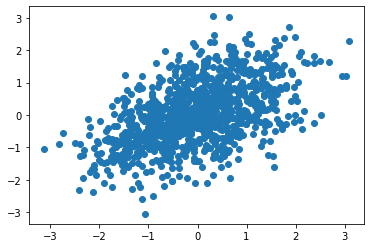

In [178]:
plt.scatter(X[:, 0], X[:, 1])

In [179]:
X.shape # 100 examples

(1000, 2)

In [180]:
# Compute eigen values of the covariancenp.linalg.norm matrix
eigen_values, eigen_vectors = np.linalg.eig(covariance)

In [181]:
eigen_vectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

## Oja's Rule
---
$$
\dot{w} = \eta \mathbb{E}[YX^T] - \eta \mathbb{E}[Y^2]w
$$

In [182]:
X_trans  = X.T
w_init = np.array([0.25, 0.35])

100%|██████████| 1000/1000 [00:07<00:00, 139.50it/s]


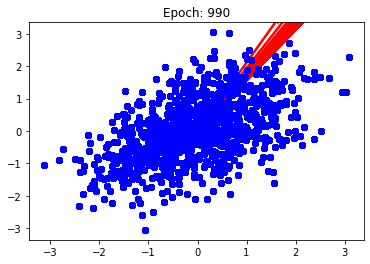

In [183]:
NUM_EPOCH = 1000
lr = 1e-2
tol = 1e-8
w = w_init
filenames = []
deltaw = np.zeros(w_init.shape)
for epoch in tqdm(range(NUM_EPOCH)):
    y = np.dot(w_init, X_trans)
    YX = y*X_trans
    exp_YX = 1/(YX.shape[1]) * np.sum(YX, axis=1)
    sm_Y = 1/(y.shape[0]) * np.sum(y**2)
    w = w + lr*(exp_YX - sm_Y*w_init)
    deltaw += (w - w_init)
    if(epoch %30 == 0):
        plt.figsize = (20, 20)
        plt.quiver(0, 0, w[0], w[1], color='r', scale=1)
        plt.scatter(X[:, 0], X[:, 1], color='b')
        plt.title('Epoch: {}'.format(epoch))
        plt.savefig('Figures/hebbian_{}.png'.format(epoch))
        filenames.append('Figures/hebbian_{}.png'.format(epoch))
    

In [184]:
with imageio.get_writer('optim.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

In [185]:
for file in filenames:
    os.remove(file)

In [190]:
print(w/np.linalg.norm(w))
print(eigen_vectors[:, 0])

[0.69627816 0.71777205]
[0.70710678 0.70710678]


In [187]:
print(eigen_values)

[0.70710678 0.70710678]
[1.5 0.5]


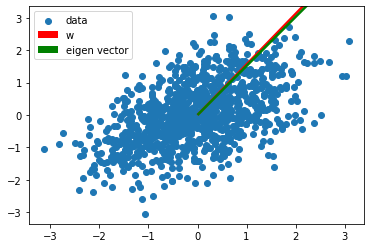

In [188]:
# plot the vector w and the guassian in the same plot
plt.scatter(X[:, 0], X[:, 1])
plt.quiver(0, 0, w[0], w[1], color='r', scale=1)
plt.quiver(0, 0, eigen_vectors[0, 0], eigen_vectors[1, 0], color='g', scale=1)
plt.legend(['data', 'w', 'eigen vector'])

![Oja's Rule](optim.gif)